# YouTube URL Analysis

## Preface
### Data descriptions

In [166]:
sample_size = 100000000 # specifies the sample size
limit = 15 # specifies the number of elements in lists and graphs

url_columns = ["id","hash","channelId","publishedAt","url","resolvedUrl","domain","resolved","dead","status_code"]
video_columns = ["id","hash","channelId","channelTitle","publishedAt","title","description","tags","categoryId","defaultLanguage","defaultAudioLanguage","duration","dimension","definition","caption","licensedContent","allowedIn","blockedIn","viewCount","likeCount","dislikeCount","favoriteCount","commentCount","requesttime"]
channel_columns = ["id","title","description","subscriberCount","videoCount","commentCount","viewCount","featuring","subscribing","country","publishedAt","daysactive","keywords","topics","wikitopics"]

### Import necessary modules

In [167]:


import numpy as np
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(14,8.27)})

### Load data

In [168]:
# load and clean URLs csv
pd_url_data = pd.read_csv('sample_' + str(sample_size) + '.csv')
pd_url_data.columns = url_columns

# add year column, based on publishedAt
pd_url_data['year'] = pd.to_datetime(pd_url_data["publishedAt"]).dt.year
pd_url_data['date'] = pd.to_datetime(pd_url_data["publishedAt"]).dt.date

# skip everything before december 2019
pd_url_data = pd_url_data[pd_url_data['date'] < datetime.date(year=2019,month=12,day=1)]

In [169]:
# load and clean channel data
pd_channel_data = pd.read_csv('channel_data/channels_from_jsoncache_100k_update.csv')
pd_channel_data.columns = channel_columns

# join with url data on channelId
pd_url_data = pd_url_data.join(pd_channel_data.set_index('id'), on='channelId', lsuffix='_urls', rsuffix='_channel')

### clean domains

In [170]:
# remove all www. or www2.
pd_url_data.replace({'domain': r'^www2?\.'}, {'domain': ''}, regex=True, inplace=True) 

# replace all open.spotify.com by spotify.com
pd_url_data.replace({'domain': r'^open\.spotify'}, {'domain': 'spotify'}, regex=True, inplace=True) 

# @todo: check domains and see whether more needs to be replaced

# Generic analysis

In [171]:
print("min date: %s, max date: %s\n" % (min(pd_url_data.date),max(pd_url_data.date)))
print("Basic stats on int/float columns")
print(pd_url_data.describe())

min date: 2005-10-24, max date: 2019-11-30

Basic stats on int/float columns
                 id      resolved          dead   status_code          year  \
count  9.883687e+07  9.883687e+07  9.883687e+07  3.453571e+07  9.883687e+07   
mean   2.888667e+08  8.416507e-01  3.527984e-02  2.247849e+02  2.016876e+03   
std    1.667982e+08  3.650682e-01  1.844862e-01  9.305223e+01  2.013434e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.005000e+03   
25%    1.443845e+08  1.000000e+00  0.000000e+00  2.000000e+02  2.016000e+03   
50%    2.889072e+08  1.000000e+00  0.000000e+00  2.000000e+02  2.017000e+03   
75%    4.333157e+08  1.000000e+00  0.000000e+00  2.000000e+02  2.018000e+03   
max    5.777381e+08  1.000000e+00  1.000000e+00  9.990000e+02  2.019000e+03   

       subscriberCount    videoCount  commentCount     viewCount  \
count     9.883617e+07  9.883617e+07    98836174.0  9.883617e+07   
mean      1.488992e+06  2.195496e+04           0.0  7.562064e+08   
std    

## Check 'dead' URLs + how many have not yet been checked 
When less than 5%, just leave it as is

@todo: too many unchecked URLs

In [172]:
# count URLs marked as dead on expansion and sort in reverse
pd_url_data_dead = len(pd_url_data.query("dead==1"))
# count total number of URLs
total = len(pd_url_data)
# calculate percentage
percent_dead = round(pd_url_data_dead/total*100,2) 
# print percentage
print("Total URLS: %s, of which %s (%s%%) dead" % (total,pd_url_data_dead,percent_dead)) 

# unchecked if resolved = 0 and dead = 0
pd_url_data_unchecked = len(pd_url_data.query('resolved==0 & dead==0'))
percent_unchecked = round(pd_url_data_unchecked/total*100,2)
print("Total URLS: %s, of which %s (%s%%) NOT yet checked" % (total,pd_url_data_unchecked,percent_unchecked)) 

Total URLS: 98836871, of which 3486949 (3.53%) dead
Total URLS: 98836871, of which 12210085 (12.35%) NOT yet checked


## Basic stats (based on videos, not channels)
### Top domains

In [173]:
# add count column
pd_url_data['count'] = 1 
# count domains in URLs data set and sort in reverse
pd_url_data_groupedDomain = pd_url_data.groupby(["domain"]).count()['count'].sort_values(ascending=False) 
# print header
print("Top %s domains" % (limit)) 
# print most used domains overall
print(pd_url_data_groupedDomain.head(limit)) 

Top 15 domains
domain
youtube.com            31501519
facebook.com           11296092
twitter.com             9056691
instagram.com           5329406
google.com              2076596
twitch.tv                977643
vk.com                   934739
soundcloud.com           536125
play.google.com          531696
amazon.com               477662
accounts.google.com      439258
itunes.apple.com         424531
pinterest.com            409978
patreon.com              372742
amazon.de                274459
Name: count, dtype: int64


### Top deep links

In [174]:
# reset count column
pd_url_data['count'] = 1 
# count resolved deep links in URLs data set and sort in reverse
pd_url_data_groupedUrl = pd_url_data.groupby(["resolvedUrl"]).count()['count'].sort_values(ascending=False) 
# print header
print("Top %s resolvedUrl" % (limit)) 
# print most used deep links
print(pd_url_data_groupedUrl.head(limit)) 

Top 15 resolvedUrl
resolvedUrl
https://www.youtube.com/error?src=404                    81582
https://unacademy.com/unavailable                        77940
https://www.youtube.com/user/euronewsnetwork/channels    73520
https://www.facebook.com/euronews                        68619
http://incompetech.com/                                  62810
https://www.zee5.com/                                    60633
https://creativecommons.org/licenses/by/4.0/)            59326
https://www.youtube.com/playlist?list...                 54079
https://www.zee5.com                                     53232
https://www.instagram.com/zee5                           51265
https://twitter.com/ZEE5India                            50696
https://www.facebook.com/ZEE5/                           50355
http://creativecommons.org/licenses/by/3.0/              47467
https://datinglogic.net/forums/forum/qa/                 45200
https://onlinedatinglogic.com/forums/forum/qa/           45124
Name: count, dtype: int6

### Top TLDs

In [175]:
# reset count column
pd_url_data['count'] = 1 
# make TLD column based on domain
pd_url_data['tld'] = pd_url_data['domain'].str.replace('^.*\.', '', regex=True) 
# count TLDs used and sort in reverse
pd_url_data_groupedTld = pd_url_data.groupby(["tld"]).count()['count'].sort_values(ascending=False)
# print header
print("Top %s TLDs" % (limit))
# print most used TLDs
print(pd_url_data_groupedTld.head(limit))

Top 15 TLDs
tld
com    74337087
tv      1676609
net      653955
in       490351
de       489522
org      479931
me       395975
ru       368970
br       294486
kr       291586
gg       273104
co       229175
jp       210632
st       192954
uk       168289
Name: count, dtype: int64


### Top domains per TLD

In [176]:
# for each tld, get limit domain
print("Top domains per TLD")
for tld in pd_url_data_groupedTld.head(limit).keys():
    top_domains_for_tld = pd_url_data[pd_url_data['tld']==tld].groupby(['tld','domain'])['hash'].nunique().sort_values(ascending=False)
    print(top_domains_for_tld[:limit])
    

Top domains per TLD
tld  domain             
com  youtube.com            19444624
     facebook.com           10817446
     twitter.com             8787461
     instagram.com           5134379
     google.com              2023622
     vk.com                   859193
     play.google.com          523203
     soundcloud.com           491362
     accounts.google.com      435286
     pinterest.com            406325
     itunes.apple.com         405116
     patreon.com              368654
     amazon.com               340927
     apps.apple.com           254375
     tumblr.com               244350
Name: hash, dtype: int64
tld  domain         
tv   twitch.tv          888751
     tfc.tv              19677
     espreso.tv          17498
     ruptly.tv           17150
     ns7.tv              17044
     lahorenews.tv       15130
     britishpathe.tv     14328
     sathiyam.tv         14241
     qazaqstan.tv        14140
     beritasatu.tv       13613
     city42.tv           13154
     samaa.tv

# Monetization

## Allowed merch and monetization on Github (by Bernhard)

In [177]:
# import merch and crowd lists
from allowed_3rdparty import merch, crowd
print("Number of merch sites: %s" % (len(merch)))
print("Number of crowd sites: %s" % (len(crowd)))

# add boolean column to pd_url_data based on presence in lists
pd_url_data["crowd"] = np.where(pd_url_data["domain"].isin(crowd), True, False)
pd_url_data["merch"] = np.where(pd_url_data["domain"].isin(merch), True, False)

Number of merch sites: 191
Number of crowd sites: 85


## Percentage of videos that have at least one merchandise or one crowd-funding link.

In [178]:
# make a column where at least one of monetized or crowd is true
monetized = pd_url_data['merch'] | pd_url_data['crowd'] 
pd_url_data['monetized'] = monetized

# get number of video ids where monetized = True
monetized_videos = pd_url_data[pd_url_data['monetized']==True]['hash'].unique()
monetized_video_number = len(monetized_videos)
total_video_number = len(pd_url_data['hash'].unique())
percent_video_monetized = round(monetized_video_number/total_video_number*100,2)
# do the same for channels
monetized_channels = pd_url_data[pd_url_data['monetized']==True]['channelId'].unique()
monetized_channel_number = len(monetized_channels)
total_channel_number = len(pd_url_data['channelId'].unique())
percent_channel_monetized = round(monetized_channel_number/total_channel_number*100,2)

print("%s videos are monetized out of %s total videos, that is %s%%" % (monetized_video_number,total_video_number,percent_video_monetized))
print("%s channels are monetized out of %s total channels, that is %s%%" % (monetized_channel_number,total_channel_number,percent_channel_monetized))

1860355 videos are monetized out of 52482918 total videos, that is 3.54%
45411 channels are monetized out of 135749 total channels, that is 33.45%


### Channel and domain counts

In [179]:
# count unique videos for each channel
videoCountForChannel = pd_url_data.groupby('channelId')['hash'].nunique()
# add videoCountForChannel as column
pd_url_data['videoCountForChannel'] = pd_url_data['channelId'].map(videoCountForChannel)

# count unique videos for each domain
videoCountForDomain = pd_url_data.groupby('domain')['hash'].nunique()
# add videoCountForDomain as column
pd_url_data['videoCountForDomain'] = pd_url_data['domain'].map(videoCountForDomain)

# count unique channels for domain
channelCountForDomain = pd_url_data.groupby('domain')['channelId'].nunique()
# add channelCountForDomain as column
pd_url_data['channelCountForDomain'] = pd_url_data['domain'].map(channelCountForDomain)

# add log(channels/videos) for domains
pd_url_data['channelDivVideoForDomain'] = pd_url_data['channelCountForDomain']/pd_url_data['videoCountForDomain']

## Number of YouTube videos per domain, per monetization type. As well as graph of domains per year, per monetization type
Beware: below calculations assume that merch or crowd URLs are only mentioned once per video


crowd domain count
                 domain  channelCountForDomain  videoCountForDomain  \
805         patreon.com                 9508.0             368654.0   
77       streamlabs.com                 4405.0             112657.0   
12207   kickstarter.com                 1550.0               3684.0   
924        gofundme.com                 1129.0              12644.0   
11184     indiegogo.com                 1046.0               2683.0   
13328        change.org                  653.0               3341.0   
2508           apoia.se                  488.0              16099.0   
4282         tipeee.com                  333.0               8616.0   
29864    vakinha.com.br                  198.0               1540.0   
33639      patronite.pl                  161.0               6671.0   
60607    justgiving.com                  154.0                763.0   
108988       catarse.me                   98.0               1159.0   
505153        omaze.com                   97.0            

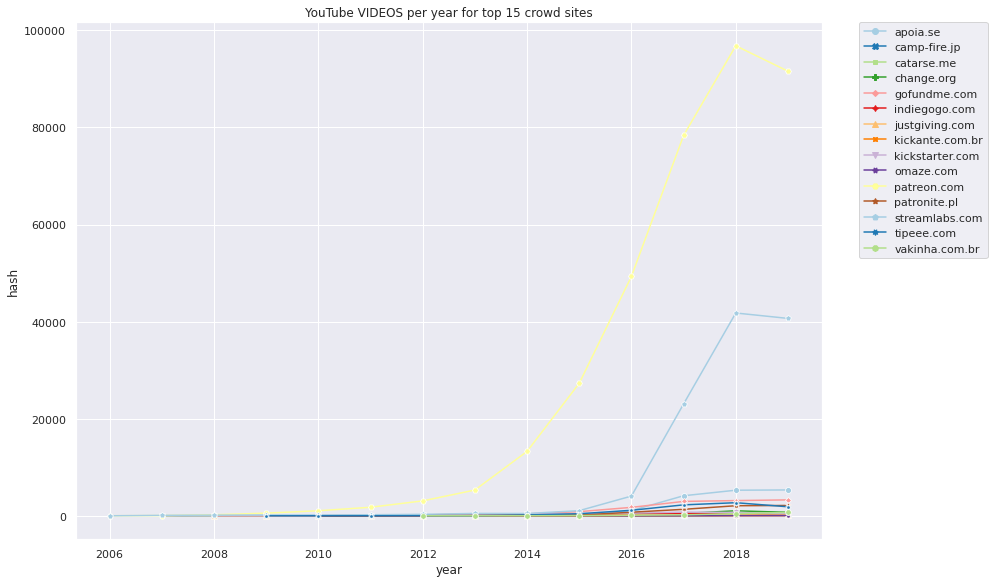

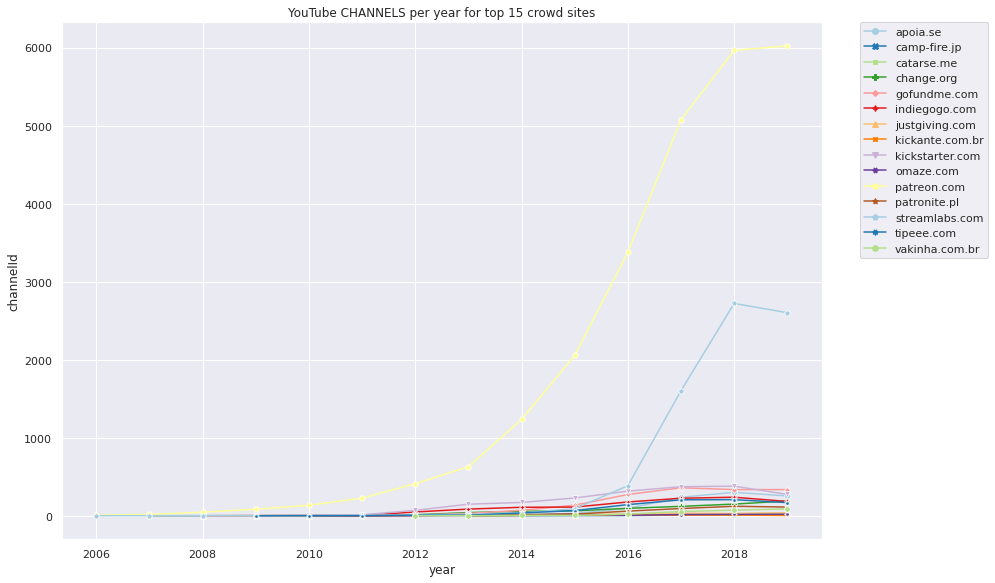

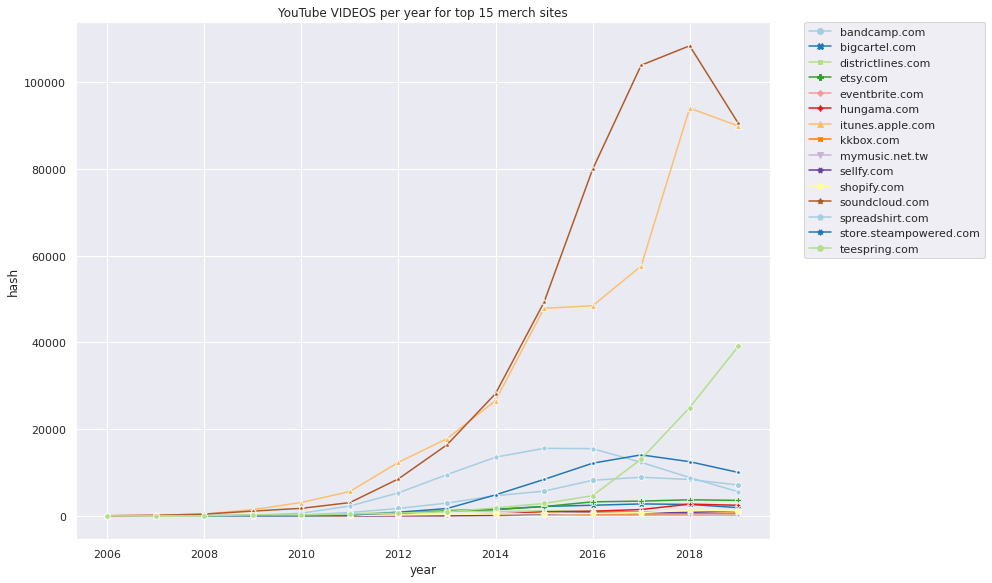

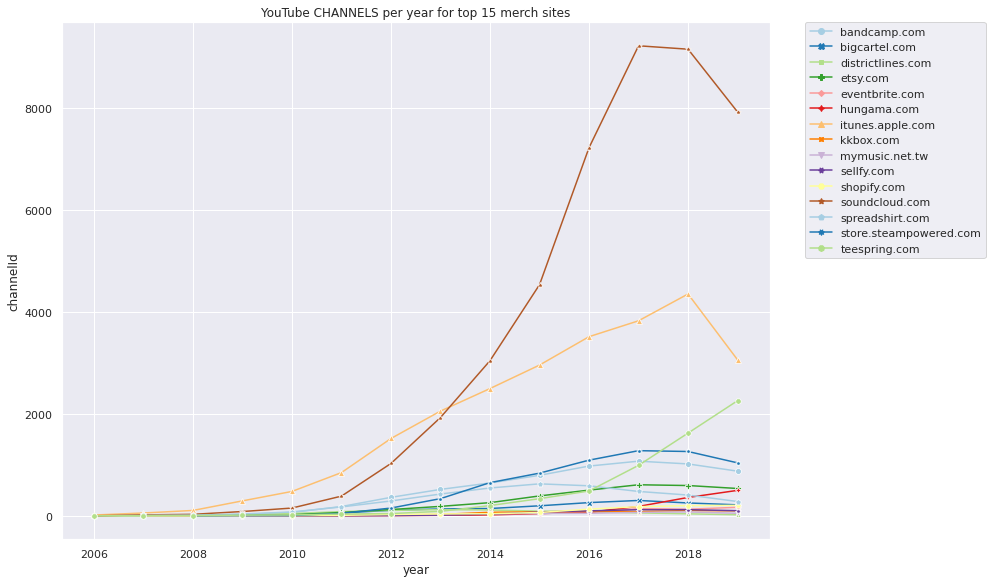

In [180]:
domain_stats = {}
for type in ['crowd','merch']:

    ''' Describe '''
    domain_stats[type] = pd_url_data[['domain','channelCountForDomain','videoCountForDomain','channelDivVideoForDomain']][pd_url_data[type]==True].drop_duplicates()

    # print header
    print("%s domain count" % type)
    # print most used TYPE domains
    print(domain_stats[type].sort_values(by=['channelCountForDomain','channelDivVideoForDomain'],ascending=False).head(limit))
    print("\n")
    # print TYPE domain stats
    print("%s domain stats" % type)
    print(domain_stats[type].describe())
    print("\n")

    ''' Graph '''

    # filter pd_url_data to only retain info for rows with TYPE domain
    filtered = {}
    filtered[type] = pd_url_data[pd_url_data[type]==True]

    # limit data by top overall TYPE domain for graph
    top_domains = {}
    top_domains[type] = domain_stats[type].sort_values(by="channelCountForDomain",ascending=False)['domain'][0:limit]
    filtered_limited = {}
    filtered_limited[type] = filtered[type][filtered[type]['domain'].isin(top_domains[type])==True]

    # get number of unique domains for color palette in graph 
    num_domains = {}
    num_domains[type] = len(filtered_limited[type]['domain'].unique())
    color_palette = {}
    color_palette[type] = sns.color_palette("Paired",n_colors=num_domains[type])

    # count videos by TYPE domain and year
    filtered_limited_count = {}
    filtered_limited_count[type] = filtered_limited[type].groupby(["domain","year"])['hash'].nunique()
    filtered_limited_count[type] = filtered_limited_count[type].to_frame()
    filtered_limited_count[type].reset_index(inplace=True)
    
    # plot rise of TYPE sites, for videos per year
    plt.figure()
    sns.lineplot(x="year", y="hash", hue="domain", style="domain", palette = color_palette[type], markers=True, dashes=False, data=filtered_limited_count[type])
    plt.title("YouTube VIDEOS per year for top %s %s sites" % (limit,type))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()

    # count channels by TYPE domain and year
    filtered_limited_count = {}
    filtered_limited_count[type] = filtered_limited[type].groupby(["domain","year"])['channelId'].nunique()
    filtered_limited_count[type] = filtered_limited_count[type].to_frame()
    filtered_limited_count[type].reset_index(inplace=True)

    # plot rise of TYPE sites, for channels per year
    plt.figure()
    sns.lineplot(x="year", y="channelId", hue="domain", style="domain", palette = color_palette[type], markers=True, dashes=False, data=filtered_limited_count[type])
    plt.title("YouTube CHANNELS per year for top %s %s sites" % (limit,type))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()


## @todo

Channel data set
* Fuse this with channels data set. Finding a way to use the URLs to characterize channels.
   * Channel categories. What hasn't been done at all in the last paper is looking at video categories. That may be done interestingly. Monetization per channel category. Channel classification is not done by video creators. 
	   * b = DataFrame(a.var1.str.split('|').tolist(), index=a.var2).stack()
	   * b = b.reset_index()[[0, 'var2']] # var1 variable is currently labeled 0
	   * b.columns = ['var1', 'var2'] # renaming var1
   * Merch and monetization per channel. When did they introduce this?
   * Whether channels changed merch or crowd-financing, giving that they not backport.
* Compare channel categories vs video categories. (But we need to import mysql database.) Is gonna be important when looking at descriptions and tags and such.
* Think of categories in terms of scatter plots. E.g. crowd funding vs merch and category. Size is number of videos.
* Via topic and/or video categories. E.g. gaming may have a very different URL profile then news/politics. 
* Merch stores with particular topical affinity (e.g. alt-right channels use store X) - alternative ways of classifying youtube. Otherway around: categories that are more suited to crowd-funding than others.

Various
* create list of "commission"
	* Official YT merch list = https://support.google.com/youtube/answer/6083754?hl=en#zippy=%2Clist-of-approved-merchandise-sites
* Domains: open.spotify.com, spotify.com, play.google.com, accounts.google.com, etc. (Does play.google.com has a commission?)

Alternative modes of classification? 
* For a channel we have channel description, keywords, all video titles and keywords. Run as a topic model.
* Video categories are unique and chosen by uploaders
* Channel category column can have several channels, is assigned done automatically by YouTube
* (channels have keywords too, which are much more descriptive. But long-tail, language specific)

Later
* what kind of channels linked to the academic publishers?
* look into what's missing. The "(note-)book" of the dead.
	* https://www.youtube.com/error?src=404
	* unacademy.com/unavailable
* graphs, instead of absolute numbers, divide into number of videos per year
* Patreon pledgers, crowd-funding sites/pledges.
* Collect ASINs. How many different products are being advertised (most popular producst - # videos, #views; youtube as amazon catalogue).
* Each URL may afford something for analysis.
* Cross-language analysis. (Videos have language, channels have country flag). 